# KaggleX BIPOC Mentorship Program 2023 

### AFRICA FOOD PRODUCTION AND SUPPLY DATA ANALYSIS

> #### Project Aims
The project seeks to evaluate three datasets, namely: Food Production, Food Supply, and Africa Population, in order to gather insights on the African food shortage issues with visualizations that can assist the continent of African's policy makers in making suitable decisions in guaranteeing food security in Africa.



##### Connecting to the Dataset for the project

In [3]:
from google.colab import drive

In [4]:
drive.mount('/content/drive')

Mounted at /content/drive


Importing Necessary libraries for the project

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import datetime as dt
import plotly.express as px
import plotly.graph_objects as go

#Dataset File Paths
#/content/drive/MyDrive/My KaggleX Final Project/Africa Food Production.csv
#/content/drive/MyDrive/My KaggleX Final Project/Africa Food Supply.csv
#/content/drive/MyDrive/My KaggleX Final Project/API_SP.POP.TOTL_DS2_en_csv_v2_4770387.csv

In [6]:
import warnings
warnings.filterwarnings('ignore')

Data Wrangling

In [7]:
# Loading dataset
Afri_food_prod = pd.read_csv('/content/drive/MyDrive/My KaggleX Final Project/Africa Food Production.csv')

In [8]:
Afri_food_prod

,Country,Item,Year,Value
0,Algeria,Wheat and products,2004,2731
1,Algeria,Wheat and products,2005,2415
2,Algeria,Wheat and products,2006,2688
3,Algeria,Wheat and products,2007,2319
4,Algeria,Wheat and products,2008,1111
...,...,...,...,...
23105,Zimbabwe,Crustaceans,2009,0
23106,Zimbabwe,Crustaceans,2010,0
23107,Zimbabwe,Crustaceans,2011,0
23108,Zimbabwe,Crustaceans,2012,0


In [9]:
#Dataset Information
Afri_food_prod.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23110 entries, 0 to 23109
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Country  23110 non-null  object
 1   Item     23110 non-null  object
 2   Year     23110 non-null  int64 
 3   Value    23110 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 722.3+ KB


In [10]:
#Satistical Description of the Dataset 
Afri_food_prod.describe()

,Year,Value
count,23110.000000,23110.000000
mean,2008.498269,327.785201
std,2.871740,1607.940343
min,2004.000000,0.000000
25%,2006.000000,3.000000
50%,2008.000000,18.000000
75%,2011.000000,108.000000
max,2013.000000,54000.000000


In [11]:
#Transposing the dataset
Afri_food_prod.T

,0,1,2,3,4,5,6,7,8,9,...,23100,23101,23102,23103,23104,23105,23106,23107,23108,23109
Country,Algeria,Algeria,Algeria,Algeria,Algeria,Algeria,Algeria,Algeria,Algeria,Algeria,...,Zimbabwe,Zimbabwe,Zimbabwe,Zimbabwe,Zimbabwe,Zimbabwe,Zimbabwe,Zimbabwe,Zimbabwe,Zimbabwe
Item,Wheat and products,Wheat and products,Wheat and products,Wheat and products,Wheat and products,Wheat and products,Wheat and products,Wheat and products,Wheat and products,Wheat and products,...,Crustaceans,Crustaceans,Crustaceans,Crustaceans,Crustaceans,Crustaceans,Crustaceans,Crustaceans,Crustaceans,Crustaceans
Year,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
Value,2731,2415,2688,2319,1111,2953,2605,2555,3432,3299,...,0,0,0,0,0,0,0,0,0,0


In [12]:
#Checking for missing values
Afri_food_prod.isnull().sum()

Country    0
Item       0
Year       0
Value      0
dtype: int64

In [13]:
#Checking for duplicates
Afri_food_prod.duplicated().sum()

0

In [14]:
#Checking for unique values from each of the features of the dataset
Afri_food_prod.nunique()

Country      45
Item         94
Year         10
Value      2134
dtype: int64

In [21]:
#Data Cleanining
Afri_food_prod['Year'] = pd.to_datetime(Afri_food_prod['Year'], format="%Y").dt.year


In [22]:
#Creating a unit column containing the symbol of kilotone in the Value coloumn
Afri_food_prod['Unit'] = 'kt'


In [23]:
Afri_food_prod.head()

,Country,Item,Year,Value,Unit
0,Algeria,Wheat and products,2004,2731,kt
1,Algeria,Wheat and products,2005,2415,kt
2,Algeria,Wheat and products,2006,2688,kt
3,Algeria,Wheat and products,2007,2319,kt
4,Algeria,Wheat and products,2008,1111,kt


In [24]:
#Checking for the data info
Afri_food_prod.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23110 entries, 0 to 23109
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Country  23110 non-null  object
 1   Item     23110 non-null  object
 2   Year     23110 non-null  int64 
 3   Value    23110 non-null  int64 
 4   Unit     23110 non-null  object
dtypes: int64(2), object(3)
memory usage: 902.9+ KB


In [25]:
#Grouping data by Country and Year to show the total value of products for different years
FoodProd = Afri_food_prod.groupby(['Country', 'Year'])
FoodProd.head()

,Country,Item,Year,Value,Unit
0,Algeria,Wheat and products,2004,2731,kt
1,Algeria,Wheat and products,2005,2415,kt
2,Algeria,Wheat and products,2006,2688,kt
3,Algeria,Wheat and products,2007,2319,kt
4,Algeria,Wheat and products,2008,1111,kt
...,...,...,...,...,...
22515,Zimbabwe,Oats,2009,1,kt
22516,Zimbabwe,Oats,2010,1,kt
22517,Zimbabwe,Oats,2011,1,kt
22518,Zimbabwe,Oats,2012,1,kt


In [26]:
#Grouping data by Country, Year and Value to show the total number of values of item produced in each country for each year
Afri_food_prod.groupby(['Country','Year'])['Value'].sum()

Country   Year
Algeria   2004    15536
          2005    15667
          2006    16417
          2007    14763
          2008    13841
                  ...  
Zimbabwe  2009     5754
          2010     6777
          2011     7551
          2012     8173
          2013     7914
Name: Value, Length: 450, dtype: int64

#Exploratory Data Analysis


> Analyzing the trend of food production in Africa.




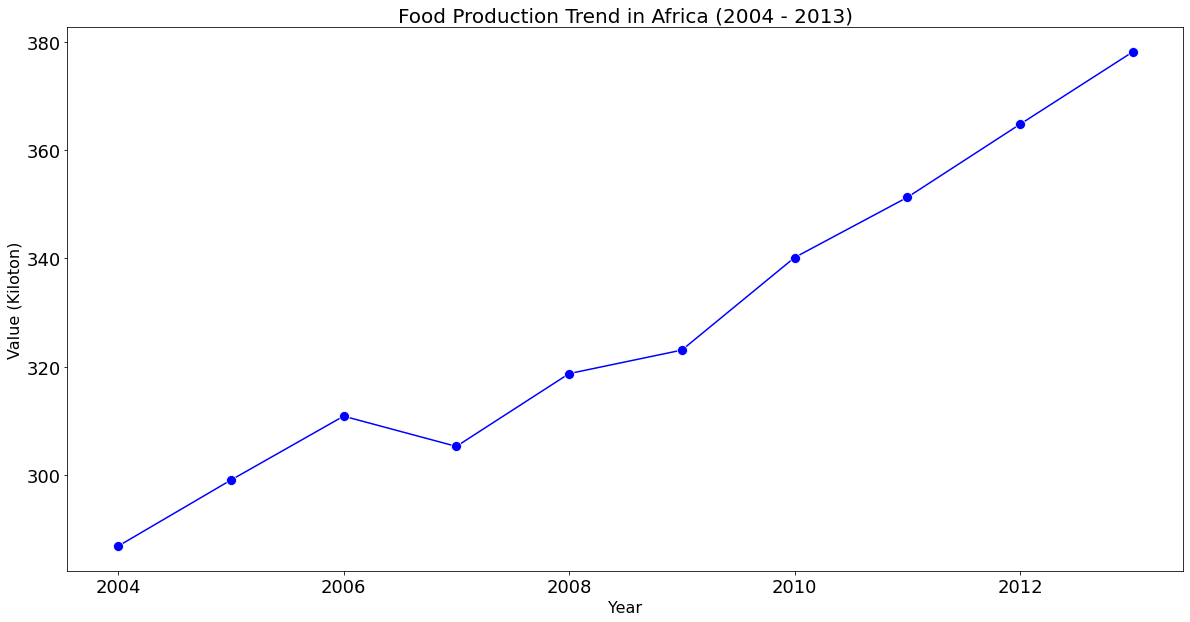

In [38]:
#Data visualization of the food production trend over time in Africa
plt.figure(figsize=[20,10])
plt.rc('xtick', labelsize=18) 
plt.rc('ytick', labelsize=18)
sns.lineplot(data=Afri_food_prod, x="Year", y="Value", marker='o', markersize=10, ci=None, color='b')
plt.title("Food Production Trend in Africa (2004 - 2013)", fontsize=20);
plt.xlabel('Year', fontsize=16)
plt.ylabel('Value (Kiloton)', fontsize=16);


In [40]:
#Data visualization of Africa food production trend over time using Histogram plot
px.histogram(Afri_food_prod, x='Year', y='Value', color ='Year', title = 'Africa Food Production Trend Over time (2004 - 2013)',
            labels = {'Year': 'Year', 'Value':'Value (Kiloton)'})

#### The trend of food production in Africa has been on a steady incline over the past few decades as seen in the plot above. However, there was production decrease in 2007 and thereafter an increase in 2008 uptill 2013.


In [41]:
#Looking at Countries with the most increase in Food Production
Afri_food_prod.groupby(['Country'])['Value'].sum().sort_values(ascending=False)

Country
Nigeria                        1628030
Egypt                           877498
South Africa                    579592
Ethiopia                        350693
United Republic of Tanzania     332802
Sudan                           301584
Ghana                           295004
Uganda                          278421
Morocco                         271821
Kenya                           256872
Cameroon                        197670
Angola                          195499
Algeria                         188650
Cote d'Ivoire                   182486
Mozambique                      157584
Malawi                          153717
Madagascar                      133071
Burkina Faso                    100129
Rwanda                           95174
Tunisia                          92713
Mali                             92292
Benin                            88072
Niger                            86808
Zambia                           82701
Zimbabwe                         73316
Guinea           

In [42]:
#Data visualization of Africa food production with line plot
plt.figure(figsize=(10,10))
Afri_food_production_plot = px.line(Afri_food_prod, x=Afri_food_prod['Year'],y=Afri_food_prod['Value'],
                          color=Afri_food_prod['Country'],
                          title ='Africa Food Production by Country (2004-2013)',
                          labels = {'Year': 'Year', 'Value':'Value (Kiloton)'})
Afri_food_production_plot.update_layout(yaxis_type='log')
Afri_food_production_plot

<Figure size 720x720 with 0 Axes>

In [45]:
#Data visualization of Africa food production with chloropleth map
fig = px.choropleth(
            locations = Afri_food_prod['Country'],
            locationmode = 'country names',
            hover_name= Afri_food_prod['Country'],
            color=Afri_food_prod['Value'],
            color_continuous_scale=px.colors.sequential.solar,
            animation_frame= Afri_food_prod['Year'],
            
)
fig.update_layout(title_text = 'Africa Food Production by Country (2004-2013)')
fig


In [46]:
#Data visualization of Africa food production with Animation

fig = px.bar(Afri_food_prod, 
             x ="Country", 
             y ="Value", 
             color ='Value',
             animation_frame ='Year',
             hover_name ='Country',
             title = 'Africa Food Production by Country',
             labels = {'Year': 'Year', 'Value':'Value (Kiloton)'})
fig.show()

### From the above interactive line animation plots, we see that Nigeria, Egypt and South Africa were the top three food producing country in Africa between year 2004 to 2013.

### On the other hand, Lesotho, Cabo Verde, Sao Tome and Djibouti were the coutries that produced the least food.



In [48]:
#Data visualization of Africa food production with Animation

fig = px.bar(Afri_food_prod, 
             x ="Country", 
             y ="Item", 
             color ='Value',
             animation_frame ='Year',
             hover_name ='Country',
             title = 'Africa Food Production by Item',
             labels = {'Year': 'Year', 'Value':'Value (Kiloton)'})
fig.show()


###Africa food products/items that were produced the most

In [ ]:
Afri_most_produced_food = pd.DataFrame(Afri_food_prod.groupby('Item')['Value'].sum().sort_values(ascending = False)).reset_index()[:30]
Afri_most_produced_food